In [1]:
from pylab import *
import numpy as np
import warnings
import matplotlib.pyplot as plt
import scipy.integrate as quad
from scipy.stats import gamma
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 20

$\displaystyle{\text{Classical expression of Hamiltonian of a system is }: \ \ H(q,p)=\frac{kq^2}{2}+\frac{p^2}{2m}}$

$\displaystyle{\begin{aligned}\text{Space coordinate }: q&=A\cos(\omega t+\phi), \\ \qquad\text{Momentum coordinate }: p&=m\dot{q}=-m\omega A \sin(\omega t+\phi), \\ \qquad &{A}\text{ being the amplitude and } \omega\text{ is the frequency of vibration}\\ \omega&=\sqrt{k/m}=>k=m\omega^2 \end{aligned}}$

$\displaystyle\begin{aligned}H(q,p) &=\frac{kq^2}{2}+\frac{p^2}{2m} \\ &= \frac{m\omega^2A^2\cos^2(\omega t+\phi)}{2}+\frac{m\omega^2 A^2 \sin^2(\omega t+\phi)}{2} \\ &=\frac{m\omega^2A^2}{2} \Big(\cos^2(\omega t+\phi)+\sin^2(\omega t+\phi)\Big) \\ &=\frac{m\omega^2A^2}{2} \\ &=E \end{aligned}$

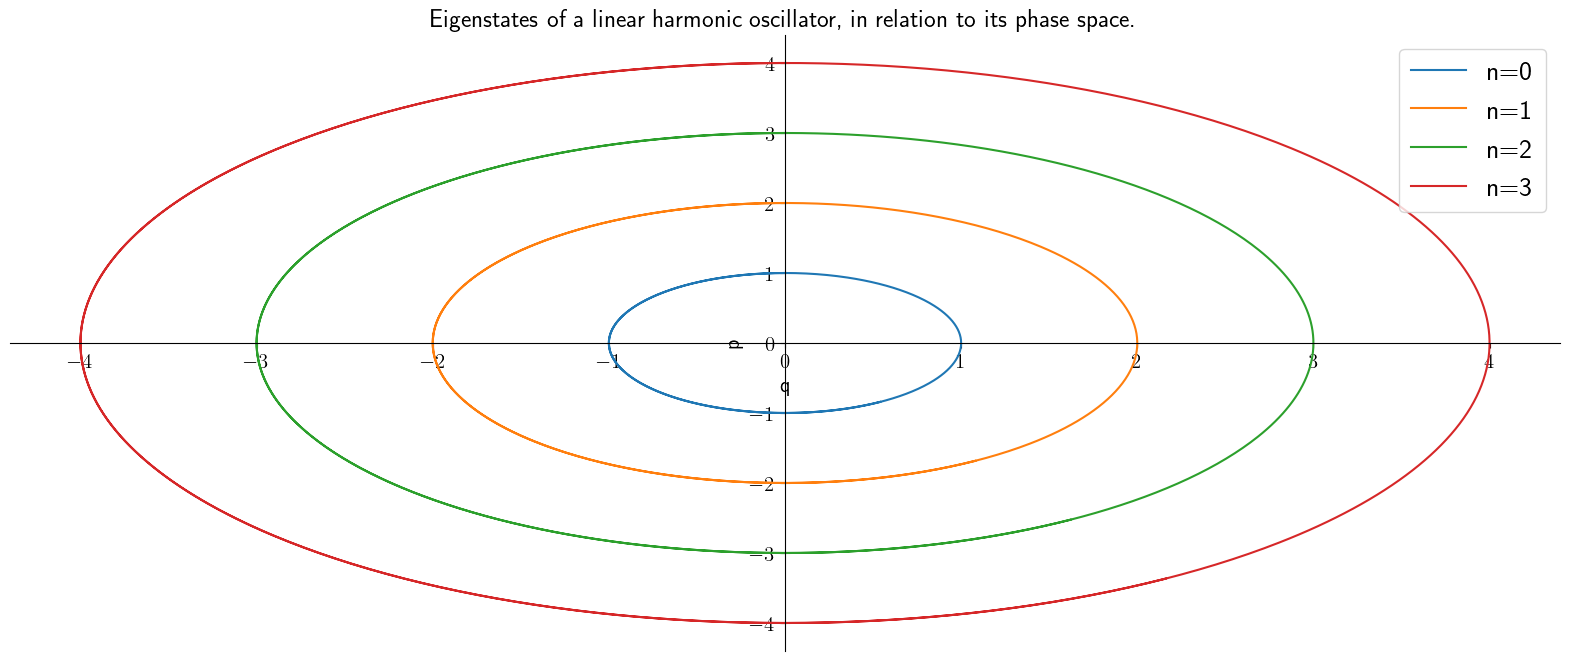

In [2]:
def q(t):
    return A*np.cos(w*t+phi)

def p(t):
    return -m*w*A*np.sin(w*t+phi)

k,m,phi=1,1,1
w=(k/m)**0.5
t=np.linspace(0,10,1000)
A= [ 1, 2 , 3, 4]
subplot(111)
for A in A:
    plt.plot(q(t),p(t),label='n=%i'%(A-1))
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.set_xlabel('q')
ax.set_ylabel('p')
plt.legend(loc='upper right')
plt.title('Eigenstates of a linear harmonic oscillator, in relation to its phase space.')
plt.show()

In [3]:
def cosh(z):
    ez = np.exp(z)
    enz = np.exp(-z)
    return (ez + enz)/2 

def tanh(z):
    ez = np.exp(z)
    enz = np.exp(-z)
    return (ez - enz)/(ez + enz) 

def sech(z):
    ez = np.exp(z)
    enz = np.exp(-z)
    return 2/(ez + enz)

def coth(z):
    ez = np.exp(z)
    enz = np.exp(-z)
    return (ez + enz)/(ez - enz)

# Langevin function:$$L(x)=\coth x-\frac{1}{x}$$

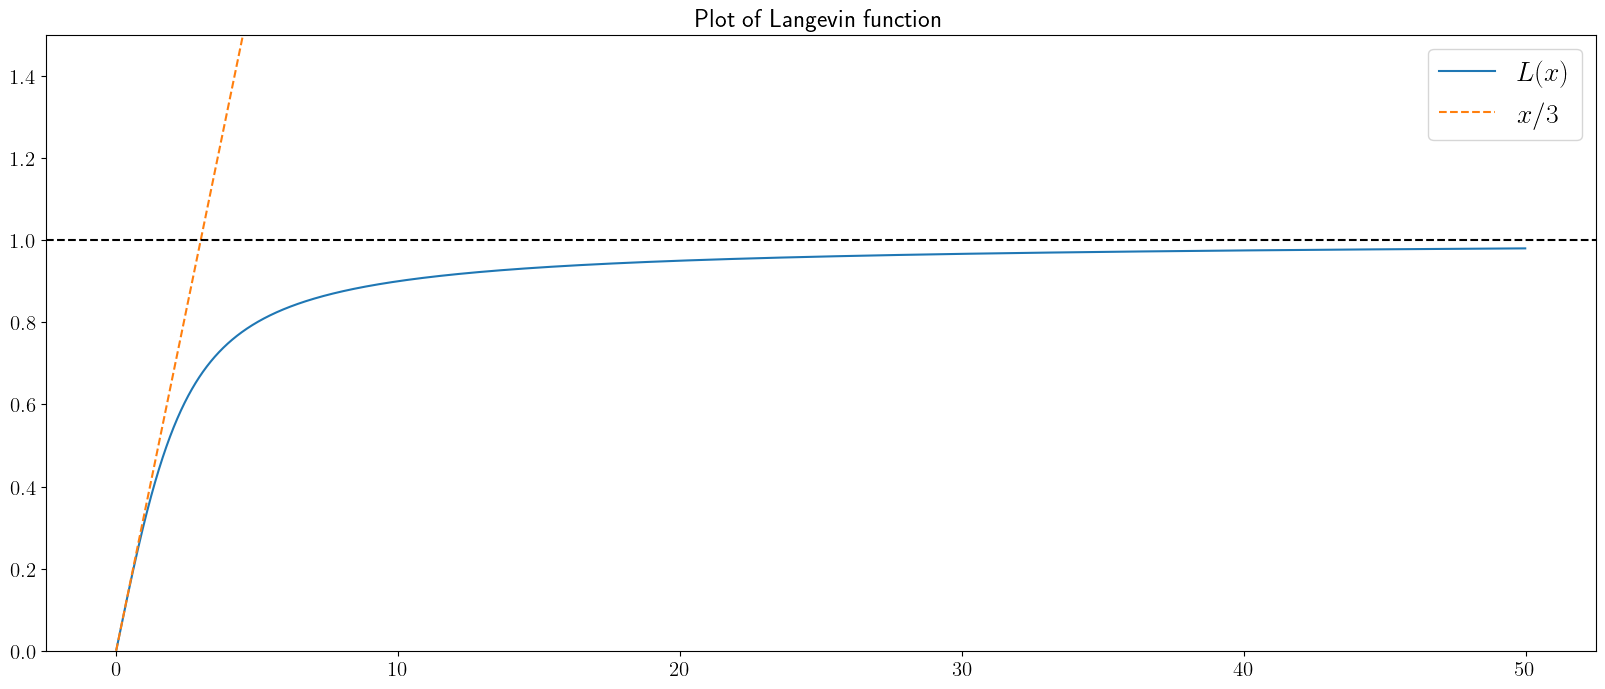

In [4]:
def Langevin(x):
    return coth(x)-(1/x)

x=np.arange(0,50,0.01)
plt.plot(x,Langevin(x),label=r'$L(x)$')
plt.plot(x,x/3,'--',label=r'$x/3$')
plt.legend()
plt.ylim(0,1.5)
plt.axhline(y=1.0, color="black", linestyle="--")
plt.title('Plot of Langevin function')
plt.show()

# Brillouin function $\displaystyle{B_J(x)}$ of order $J$: $$\displaystyle{B_J(x)=\Big(1+\frac{1}{2J}\Big)\coth\Big\{\Big(1+\frac{1}{2J}\Big)x\Big\}-\frac{1}{2J}\coth\Big\{\frac{1}{2J}x\Big\}}$$

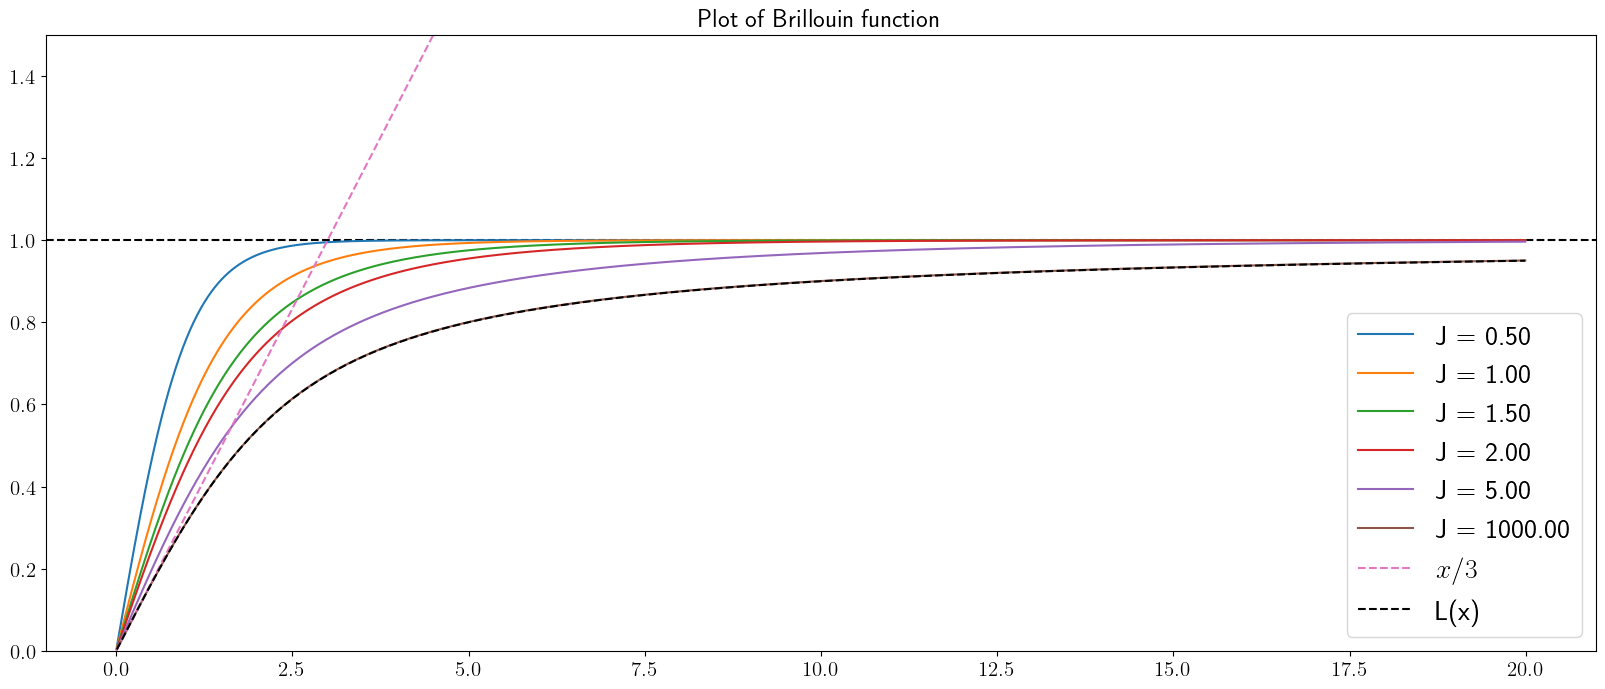

In [5]:
def Brillouin(J,x):
    return (1+(1/(2*J)))*coth((1+(1/(2*J)))*x)-(1/(2*J))*coth((1/(2*J))*x)

x=np.arange(0,20,0.01)
J1=[1/2, 1, 3/2, 2, 5, 1000]

plt.axhline(y=1.0, color="black", linestyle="--")

for J in J1:
    plt.plot(x,Brillouin(J,x), label=' J = %0.2f'%J)
plt.plot(x,x/3,'--',label=r'$x/3$')  
plt.plot(x,Langevin(x),'k--',label='L(x)')
plt.legend()    
plt.ylim(0,1.5)
plt.title('Plot of Brillouin function')
plt.show()

From the graphical view we can conclude that as $J \rightarrow\infty \qquad B_J(x)\rightarrow L(x)$ 

## $$\displaystyle{\textbf{Thermodynamics of a magnetic systems in negative temperatures}}$$

Consider a system of dipoles with spins $J=\frac{1}{2}$ and no. of possible orientation $g=2$ .                             
It has two orientations, the corresponding energies being $\displaystyle{-\mu_o\mu_BH}$ and $\displaystyle{+\mu_o\mu_BH}$;                               
let us call these energies $-\epsilon$ and $+\epsilon$ ; $\displaystyle{i.e. \ \  \epsilon=\mu_o\mu_BH \qquad \beta=\frac{1}{kT}}$.

$$\displaystyle{\text{Partition function of the system,} Q_N(\beta)=(e^{\beta\epsilon}+e^{-\beta\epsilon})^N=\{ 2\cosh(\beta\epsilon)  \}^N  \qquad\qquad\qquad\quad-(1}$$

$$\displaystyle{\text{Helmholtz free energy, }  A=-kT\ln Q_N(\beta)=-NkT\ln\Big\{2\cosh\big(\frac{\epsilon}{kT}\big)\Big\},\qquad\qquad\qquad-(2}      $$
from which                                                                                              
 $$\displaystyle{\text{Entropy, }S=-\Big(\frac{\partial A}{\partial T}\Big)_H= Nk\Big[\ln\Big\{2\cosh\big(\frac{\epsilon}{kT}\big)\Big\}-\frac{\epsilon}{kT}\tanh\big(\frac{\epsilon}{kT}\big)\Big]\qquad\qquad\qquad \ -(3  }$$
 
 $$\displaystyle{\text{Internal Energy, }U=A+TS=-N\epsilon\tanh\big(\frac{\epsilon}{kT}\big)\qquad\qquad\qquad\qquad\qquad\qquad\qquad-(4    }$$
 
 $$\displaystyle{\text{Magnetization, }M=\frac{1}{\mu_o}\Big(\frac{\partial A}{\partial H}\Big)_T = N\mu_B \tanh \big(\frac{\epsilon}{kT}\big)\qquad\qquad\qquad \qquad \qquad\quad\qquad-(5}$$
 
 $$\displaystyle{\text{Specific heat of the system, } C=\Big(\frac{\partial U}{\partial T}\Big)_H=Nk\big(\frac{\epsilon}{kT}\big)^2  \text{sech}^2\big(\frac{\epsilon}{kT}\big)\qquad\qquad\qquad\quad \ -(6}$$
 
 So let us consider $\displaystyle{x=\frac{kT}{\epsilon}}$, so then
 $$\displaystyle{\frac{S}{Nk}= \ln\Big\{2\cosh\big(\frac{1}{x}\big)\Big\}-\frac{\tanh\big(\frac{1}{x}\big)}{x}}$$
 
 $$\displaystyle{\frac{U}{N\epsilon}=-\tanh\big(\frac{1}{x}\big)}$$
 
 $$\displaystyle{\frac{M}{N\mu_B}=  \tanh \big(\frac{1}{x}\big)}$$
 
 $$\displaystyle{\frac{C}{Nk}=\Big(\frac{\text{sech}\big(\frac{1}{x}\big)}{x}\Big)^2}$$

In [6]:
plt.rcParams["figure.figsize"] = (20,16)

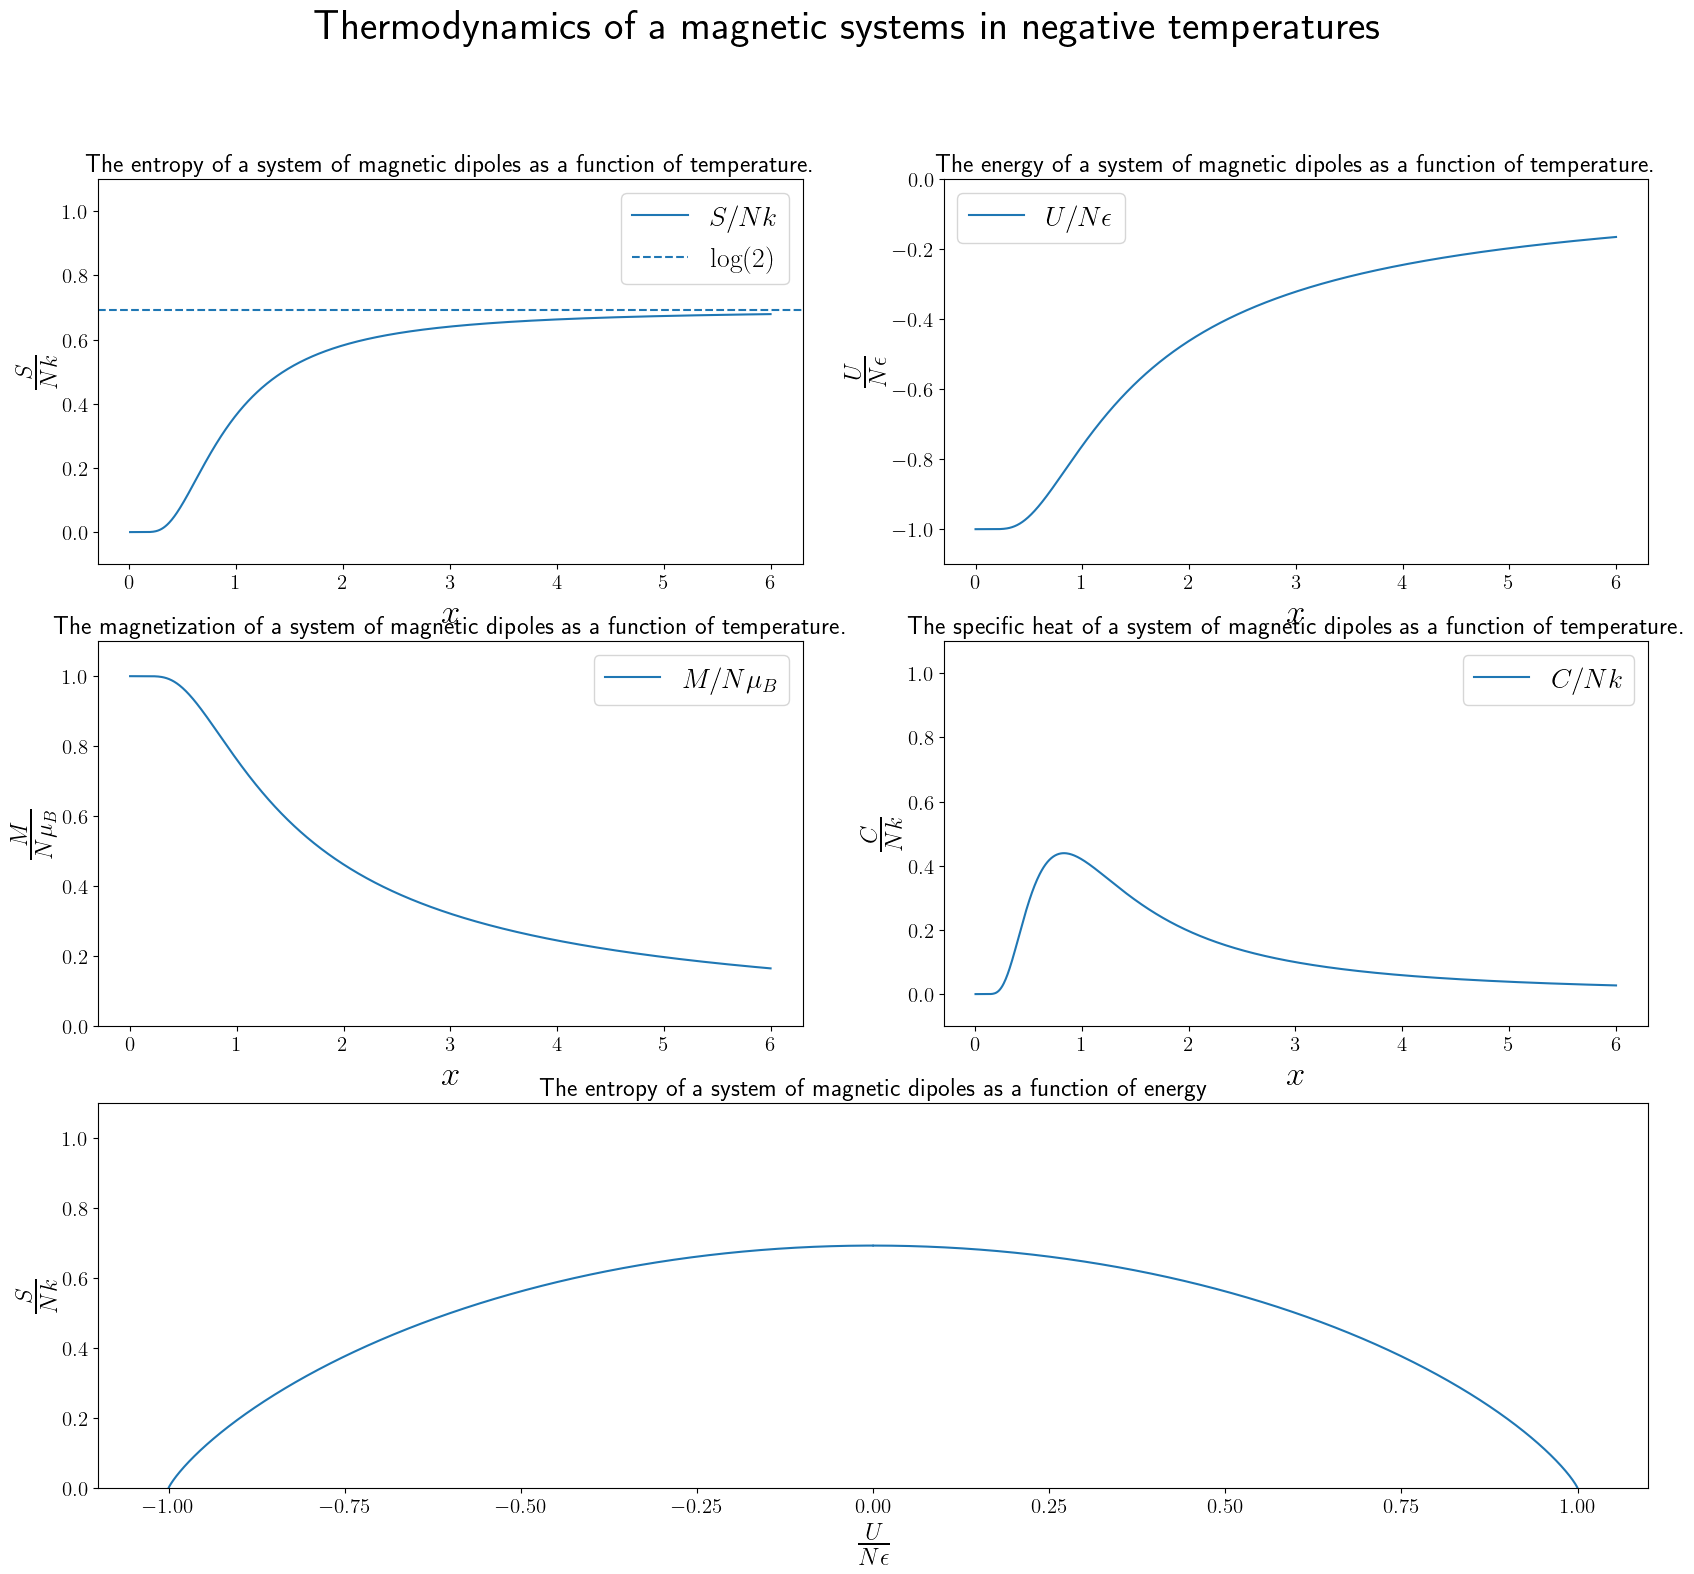

In [7]:
x=np.linspace(0,6,1000)

def S_Nk(x):
    return np.log(2*cosh(1/x))-(1/x)*tanh(1/x)

def U_NE(x):
    return -np.tanh(1/x)

def M_Nu(x):
    return np.tanh(1/x)

def C_Nk(x):
    return ((np.tanh(1/x)/np.sinh(1/x))/x)**2


fig = plt.figure(figsize = (20, 17))
gs=fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,:])

ax1.plot(x, S_Nk(x), label=r'$S/Nk$')
ax1.axhline(np.log(2),linestyle='--', label=r'$\log (2)$')
ax1.set_title('The entropy of a system of magnetic dipoles as a function of temperature.')
ax1.set_ylabel(r'$\frac{S}{Nk}$', fontsize=25)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylim(-0.1,1.1)
ax1.legend()

ax2.plot(x, U_NE(x),  label=r'$U/N \epsilon$')
ax2.set_title('The energy of a system of magnetic dipoles as a function of temperature.')
ax2.set_ylabel(r'$\frac{U}{N\epsilon}$', fontsize=25)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylim(-1.1,0)
ax2.legend()

ax3.plot(x, M_Nu(x), label=r'$M/N \mu_B$')
ax3.set_title('The magnetization of a system of magnetic dipoles as a function of temperature.')
ax3.set_ylabel(r'$\frac{M}{N\mu_B}$', fontsize=25)
ax3.set_xlabel(r'$x$', fontsize=25)
ax3.set_ylim(0,1.1)
ax3.legend()

ax4.plot(x, C_Nk(x),  label=r'$C/Nk$')
ax4.set_title('The specific heat of a system of magnetic dipoles  as a function of temperature.')
ax4.set_ylabel(r'$\frac{C}{Nk}$', fontsize=25)
ax4.set_xlabel(r'$x$', fontsize=25)
ax4.set_ylim(-0.1,1.1)
ax4.legend()

x=np.linspace(-1001,1001,1000001)
ax5.plot(U_NE(x),S_Nk(x))
ax5.set_title('The entropy of a system of magnetic dipoles as a function of energy')
ax5.set_xlabel(r'$\frac{U}{N\epsilon}$', fontsize=25)
ax5.set_ylabel(r'$\frac{S}{Nk}$', fontsize=25)
ax5.set_ylim(0,1.1)
ax5.set_xlim(-1.1,1.1)

plt.suptitle('Thermodynamics of a magnetic systems in negative temperatures', fontsize=30)
plt.show()

---

<span style="color:red">**Question 1**                                                                                                                        
1. <span style="color:red">Write a Python function to compute the canonical Maxwell–Boltzmann partition function of a 2-level system with energies $\epsilon$ and $2\epsilon$ as a function of $k_B T$.                                                                                                                                     
   <span style="color:red">Generate an array for $k_B T$. (Students must be encouraged to find an appropriate range and increment for this array).<span style="color:red">                                     
2. <span style="color:red">Calculate the partition function $Z$ as another array using the above function.                                                                             
3. <span style="color:red">From the partition function calculate the following quantities and plot each of them as a function of $k_B T$ :                                        
   (a) Internal energy $U$,                                                                                                                                   
   (b) Energy fluctuation $\Delta E$,                                                                                                                                   
   (c) Specific heat at constant volume $C_V$,                                                                                                                                   
   (d) Free energy $F$,                                                                                                                                   
   (e) Entropy $S$.                                                                                                                                           
4. <span style="color:red">Finally, show how the occupation numbers of the states vary with temperature.                                                                                                                                   
   (You may take the value of $\epsilon = 1$).



For a 2-level system,                                                                                                                                          
Let $E_0=\epsilon,\; E_1=2\epsilon,\; \beta=\frac{1}{k_B T}$.                                                                                                 
**Partition function** :

$$
Z(\beta)=e^{-\beta\epsilon}+e^{-2\beta\epsilon}=e^{-\beta\epsilon}\bigl(1+e^{-\beta\epsilon}\bigr).
$$

**Occupation probabilities** :

$$
p_0=\frac{e^{-\beta\epsilon}}{Z}=\frac{1}{1+e^{-\beta\epsilon}},\qquad
p_1=\frac{e^{-2\beta\epsilon}}{Z}=\frac{e^{-\beta\epsilon}}{1+e^{-\beta\epsilon}}.
$$

**Internal energy** $U=\langle E\rangle$:

$$
U=\frac{\epsilon e^{-\beta\epsilon}+2\epsilon e^{-2\beta\epsilon}}{Z}
= \epsilon\frac{1+2e^{-\beta\epsilon}}{1+e^{-\beta\epsilon}}.
$$

Expectation of $E^2$:

$$
\langle E^2\rangle=\frac{\epsilon^2 e^{-\beta\epsilon} + (2\epsilon)^2 e^{-2\beta\epsilon}}{Z}
=\epsilon^2\frac{1+4e^{-\beta\epsilon}}{1+e^{-\beta\epsilon}}.
$$

**Energy fluctuation** and **standard deviation** :

$$
\Delta E^2=\langle E^2\rangle - \langle E\rangle^2,
\qquad
\Delta E=\sqrt{\Delta E^2}.
$$

Using the forms above you can expand algebraically if desired.

**Specific heat** (at constant volume) :

$$
C_V=\frac{\partial U}{\partial T}=\frac{\Delta E^2}{k_B T^2}.
$$

**Free energy** :

$$
F=-k_B T\ln Z = -k_B T\left(-\beta\epsilon + \ln(1+e^{-\beta\epsilon})\right)
= \epsilon - k_B T\ln(1+e^{-\beta\epsilon}).
$$

(Using $\ln Z = -\beta\epsilon + \ln(1+e^{-\beta\epsilon})$.)

**Entropy** :

$$
S=\frac{U-F}{T} = \frac{U - (\epsilon - k_B T\ln(1+e^{-\beta\epsilon}))}{T}.
$$


$$
\frac{S}{k_B} = -p_0\ln p_0 - p_1\ln p_1 .
$$

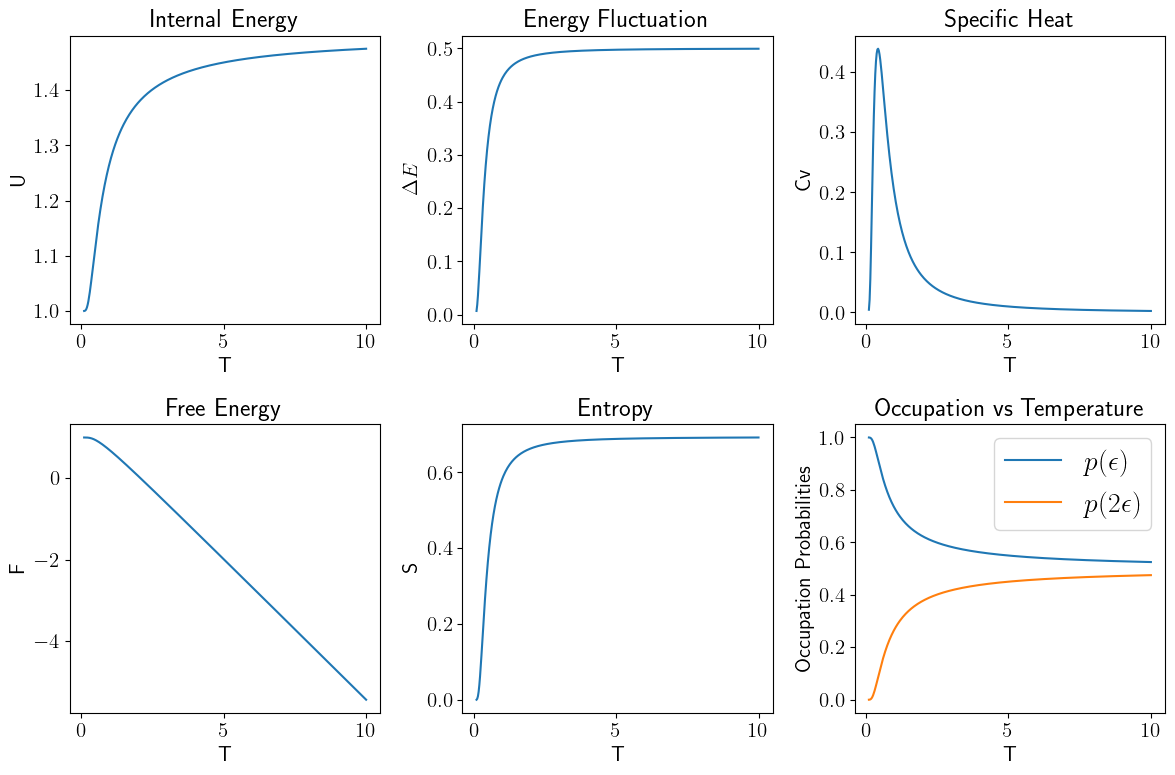

In [8]:
def Z(beta):
    return np.exp(-beta*eps) + np.exp(-2*beta*eps)

def U(beta):
    return (eps*np.exp(-beta*eps) + 2*eps*np.exp(-2*beta*eps)) / Z(beta)

def E2(beta):
    return (eps**2*np.exp(-beta*eps) + (2*eps)**2*np.exp(-2*beta*eps)) / Z(beta)

def fluctuation(beta):
    return np.sqrt(E2(beta) - U(beta)**2)

def Cv(beta, T):
    return (E2(beta) - U(beta)**2) / (kB*T**2)

def F(beta, T):
    return -kB*T*np.log(Z(beta))

def S(beta, T):
    return (U(beta) - F(beta, T)) / T

def occupations(beta):
    Zval = Z(beta)
    p0 = np.exp(-beta*eps)/Zval
    p1 = np.exp(-2*beta*eps)/Zval
    return p0, p1

kB = 1.0   # set k_B = 1 (units)
eps = 1.0  # epsilon = 1
T = np.linspace(0.1, 10, 400)
beta = 1/(kB*T)

U_vals  = U(beta)
dE_vals = fluctuation(beta)
Cv_vals = Cv(beta, T)
F_vals  = F(beta, T)
S_vals  = S(beta, T)

p0_vals, p1_vals = occupations(beta)

plt.figure(figsize=(12,8))

plt.subplot(231)
plt.plot(T, U_vals)
plt.xlabel("T"); plt.ylabel("U"); plt.title("Internal Energy")

plt.subplot(232)
plt.plot(T, dE_vals)
plt.xlabel("T"); plt.ylabel(r"$\Delta E$"); plt.title("Energy Fluctuation")

plt.subplot(233)
plt.plot(T, Cv_vals)
plt.xlabel("T"); plt.ylabel("Cv"); plt.title("Specific Heat")

plt.subplot(234)
plt.plot(T, F_vals)
plt.xlabel("T"); plt.ylabel("F"); plt.title("Free Energy")

plt.subplot(235)
plt.plot(T, S_vals)
plt.xlabel("T"); plt.ylabel("S"); plt.title("Entropy")

plt.subplot(236)
plt.plot(T, p0_vals, label=r"$p(\epsilon)$")
plt.plot(T, p1_vals, label=r"$p(2\epsilon)$")
plt.xlabel("T"); plt.ylabel("Occupation Probabilities")
plt.title("Occupation vs Temperature")
plt.legend()

plt.tight_layout()
plt.show()

<span style="color:red">**Question 2**

<span style="color:red">Consider a quantum harmonic oscillator with energy levels
$$
E_n = \hbar\omega\left(n+\tfrac{1}{2}\right),\qquad n=0,1,2,\dots
$$
Take $\hbar\omega = 1$ (so $E_n = n+\tfrac{1}{2}$). Treat the system in the canonical ensemble.

1. <span style="color:red">Write a Python function to compute the canonical partition function
   $$
   Z(\beta)=\sum_{n=0}^{\infty} e^{-\beta E_n}
   $$
   (use $\beta = 1/(k_B T)$; take $k_B=1$ units or include $k_B$ explicitly).                                                                                  
   <span style="color:red">Show that $Z$ can be written in closed form and verify numerically by summing many terms.

3. <span style="color:red">Calculate and plot the following quantities as functions of $k_B T$ (or $T$ in units where $k_B=1$):

   * (a) <span style="color:red">Internal energy $U(\beta)=\langle E\rangle$,                                                                                                          
   * (b) <span style="color:red">Energy fluctuation $\Delta E = \sqrt{\langle E^2\rangle - \langle E\rangle^2}$,                                                                       
   * (c) <span style="color:red">Heat capacity $C_V = \partial U/\partial T$,                                                                                                                
   * (d) <span style="color:red">Helmholtz free energy $F = -k_B T \ln Z$,                                                                                                         
   * (e) <span style="color:red">Entropy $S = (U - F)/T$.

4. <span style="color:red">Compute and plot the occupation probabilities $p_n = e^{-\beta E_n}/Z$ for the first few levels (e.g., $n=0\ldots 10$) as a function of temperature.

5. <span style="color:red">Compare analytic formulas with numeric sums to show convergence.

Given $\hbar\omega=1$ and $k_B=1$

The geometric-series sum gives the closed form:

$$
Z(\beta) = \sum_{n=0}^\infty e^{-\beta (n+1/2)} = e^{-\beta/2}\sum_{n=0}^\infty (e^{-\beta})^n
= \frac{e^{-\beta/2}}{1-e^{-\beta}}.
$$

From this:

* Free energy:

  $$
  F(\beta) = -\frac{1}{\beta}\ln Z(\beta) = -\frac{1}{\beta}\left(-\frac{\beta}{2} -\ln(1-e^{-\beta})\right)
  = \frac{1}{2} + \frac{1}{\beta}\ln(1-e^{-\beta}).
  $$
* Internal energy:

  $$
  U(\beta) = -\frac{\partial}{\partial \beta}\ln Z(\beta)
  = \frac{1}{2} + \frac{1}{e^{\beta}-1}.
  $$

  (Or equivalently the familiar Bose result $U=\tfrac{1}{2}+\tfrac{1}{2}\coth(\beta/2)$; the above is simpler with $\hbar\omega=1$.)
* $\langle E^2\rangle$ can be obtained by

  $$
  \langle E^2\rangle = \frac{1}{Z}\sum_n E_n^2 e^{-\beta E_n}.
  $$

  You can evaluate it either by analytic differentiation of $\ln Z$ twice:

  $$
  \frac{\partial^2}{\partial\beta^2}\ln Z = \langle E\rangle^2 - \langle E^2\rangle,
  $$

  then compute $\Delta E = \sqrt{\langle E^2\rangle - \langle E\rangle^2}$.
* Heat capacity:

  $$
  C_V = \frac{dU}{dT} = \beta^2(\langle E^2\rangle - \langle E\rangle^2)
  \quad(\text{with } \beta=1/T,\,k_B=1).
  $$
* Entropy:

  $$
  S = \frac{U-F}{T}.
  $$

* At **low temperature** $T\ll 1$ (in our units), the oscillator occupies mostly the ground state $n=0$: $U\to 1/2$, $S\to 0$, $C_V\to 0$.
* At **high temperature** $T\gg 1$, equipartition leads to $U\sim T$ (classical limit), $C_V\to 1$ (since in these units each quadratic degree gives 1/2 and two degrees give 1), and entropy grows ~$\ln T$.
* The numerical sum over $n$ converges quickly because $e^{-\beta E_n}$ decays geometrically when $\beta>0$; choose `nmax` large enough (e.g. 300–1000) for very low $T$.


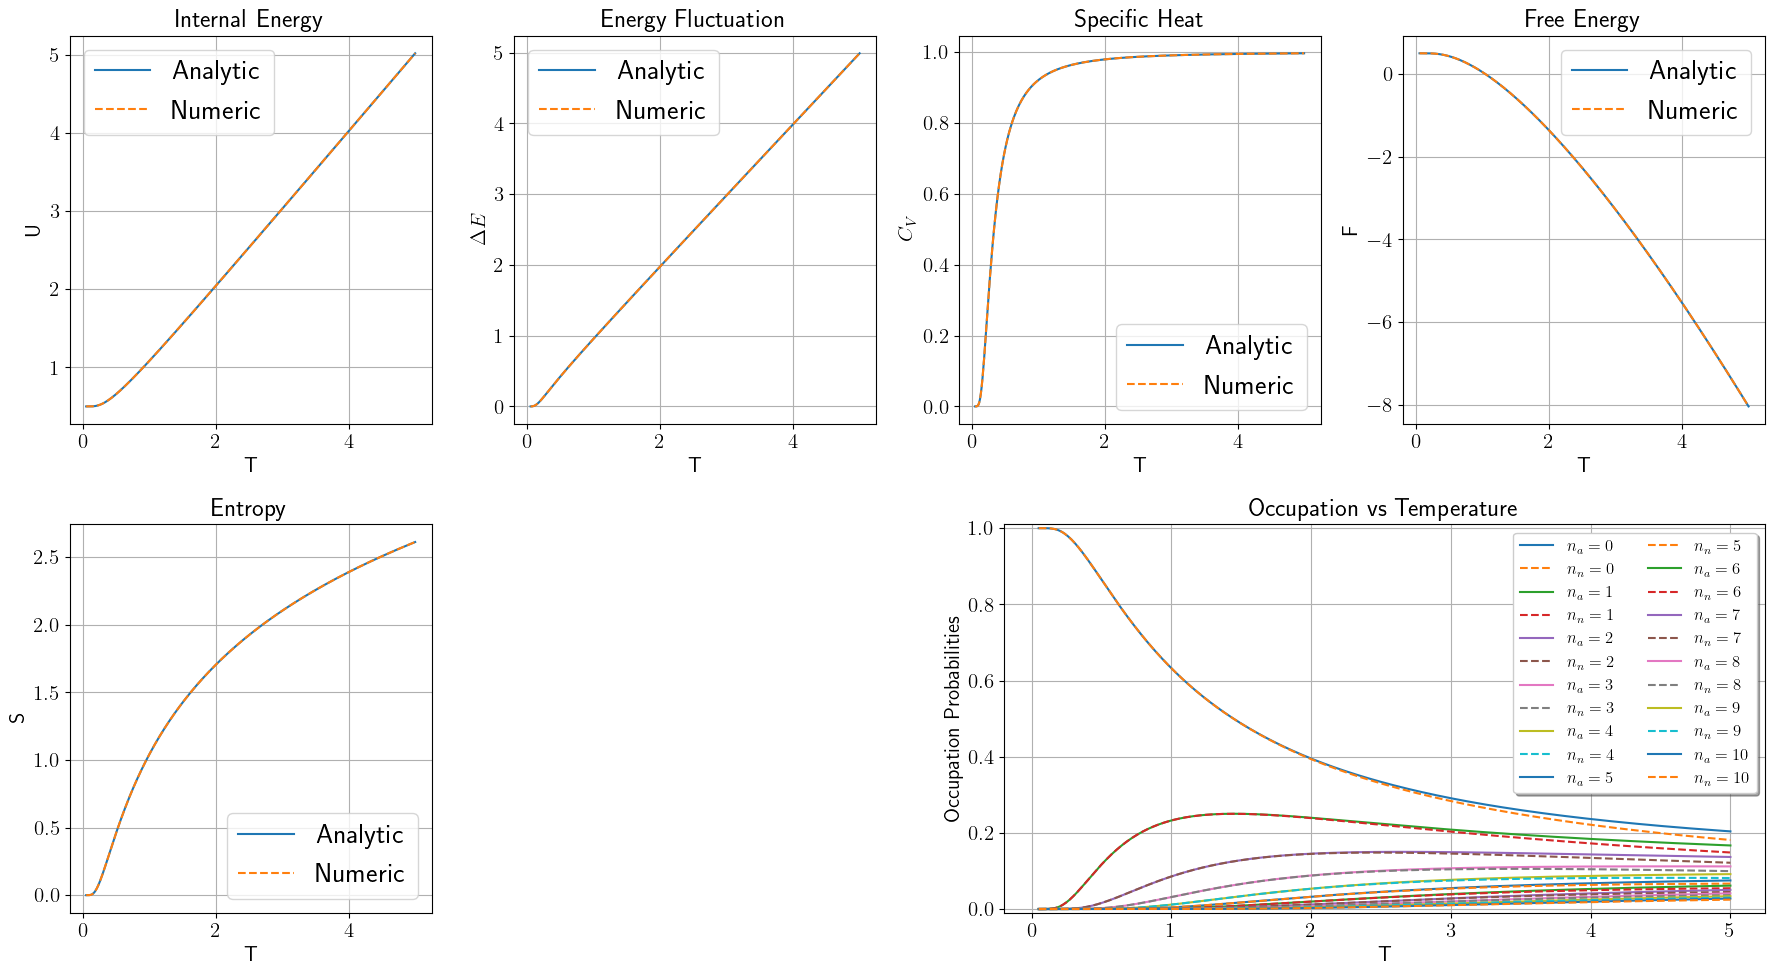

In [9]:
def Z_analytic(beta):
    return np.exp(-0.5*beta*hw) / (1 - np.exp(-beta*hw))

def U_analytic(beta):
    return 0.5*hw + hw / (np.exp(beta*hw) - 1)

def E2_analytic(beta):
    return U_analytic(beta)**2 + (hw**2 * np.exp(beta*hw)) / ((np.exp(beta*hw) - 1)**2)

def fluctuation_analytic(beta):
    return np.sqrt(E2_analytic(beta) - U_analytic(beta)**2)

def Cv_analytic(beta, T):
    return (fluctuation_analytic(beta)**2) / (kB * T**2)

def F_analytic(beta, T):
    return -kB * T * np.log(Z_analytic(beta))

def S_analytic(beta, T):
    return (U_analytic(beta) - F_analytic(beta, T)) / T

def occupations_analytic(beta, n_levels=10):
    n = np.arange(0, n_levels+1)
    En = (n + 0.5) * hw
    expo = np.exp(-np.outer(beta, En))
    Zs = np.sum(expo, axis=1)[:, None]
    return expo / Zs

def Z_numeric(beta, nmax=100):
    n = np.arange(0, nmax+1)
    En = (n + 0.5) * hw
    return np.sum(np.exp(-np.outer(beta, En)), axis=1)

def U_numeric(beta, nmax=100):
    n = np.arange(0, nmax+1)
    En = (n + 0.5) * hw
    expo = np.exp(-np.outer(beta, En))
    Z = np.sum(expo, axis=1)[:, None]
    return np.sum(En * expo, axis=1) / Z.flatten()

def E2_numeric(beta, nmax=100):
    n = np.arange(0, nmax+1)
    En = (n + 0.5) * hw
    expo = np.exp(-np.outer(beta, En))
    Z = np.sum(expo, axis=1)[:, None]
    return np.sum((En**2) * expo, axis=1) / Z.flatten()

def fluctuation_numeric(beta, nmax=100):
    return np.sqrt(E2_numeric(beta, nmax) - U_numeric(beta, nmax)**2)

def Cv_numeric(beta, T, nmax=100):
    return (fluctuation_numeric(beta, nmax)**2) / (kB * T**2)

def F_numeric(beta, T, nmax=100):
    return -kB * T * np.log(Z_numeric(beta, nmax))

def S_numeric(beta, T, nmax=100):
    U = U_numeric(beta, nmax)
    F = F_numeric(beta, T, nmax)
    return (U - F) / T

def occupations_numeric(beta, n_levels=10, nmax=100):
    n = np.arange(0, n_levels+1)
    En = (n + 0.5) * hw
    expo = np.exp(-np.outer(beta, En))
    Zs = np.sum(np.exp(-np.outer(beta, np.arange(0,nmax+1)*hw + 0.5*hw)), axis=1)[:, None]
    return expo / Zs

kB = 1.0
hw = 1.0
nmax = 200  # number of levels for numeric sum
T = np.linspace(0.05, 5.0, 400)
beta = 1.0 / (kB * T)

U_a = U_analytic(beta)
U_n = U_numeric(beta)

DeltaE_a = fluctuation_analytic(beta)
DeltaE_n = fluctuation_numeric(beta)

Cv_a = Cv_analytic(beta, T)
Cv_n = Cv_numeric(beta, T)

F_a = F_analytic(beta, T)
F_n = F_numeric(beta, T)

S_a = S_analytic(beta, T)
S_n = S_numeric(beta, T)

p_n_a = occupations_analytic(beta)
p_n_n = occupations_numeric(beta)

plt.figure(figsize=(18, 10))

plt.subplot(241)
plt.plot(T, U_a, label='Analytic')
plt.plot(T, U_n, '--', label='Numeric')
plt.xlabel('T'); plt.ylabel('U'); plt.title('Internal Energy')
plt.legend(); plt.grid(True)

plt.subplot(242)
plt.plot(T, DeltaE_a, label='Analytic')
plt.plot(T, DeltaE_n, '--', label='Numeric')
plt.xlabel('T'); plt.ylabel(r'$\Delta E$'); plt.title('Energy Fluctuation')
plt.legend(); plt.grid(True)

plt.subplot(243)
plt.plot(T, Cv_a, label='Analytic')
plt.plot(T, Cv_n, '--', label='Numeric')
plt.xlabel('T'); plt.ylabel(r'$C_V$'); plt.title('Specific Heat')
plt.legend(); plt.grid(True)

plt.subplot(244)
plt.plot(T, F_a, label='Analytic')
plt.plot(T, F_n, '--', label='Numeric')
plt.xlabel('T'); plt.ylabel('F'); plt.title('Free Energy')
plt.legend(); plt.grid(True)

plt.subplot(245)
plt.plot(T, S_a, label='Analytic')
plt.plot(T, S_n, '--', label='Numeric')
plt.xlabel('T'); plt.ylabel('S'); plt.title('Entropy')
plt.legend(); plt.grid(True)

plt.subplot(2,2,(4,6))
n_levels = 10
for j in range(n_levels+1):
    plt.plot(T, p_n_a[:, j], label=rf"$n_a={j}$")
    plt.plot(T, p_n_n[:, j], '--', label=rf"$n_n={j}$")
plt.xlabel('T'); plt.ylabel('Occupation Probabilities')
plt.title('Occupation vs Temperature')
plt.legend( loc='upper right', fancybox=True, shadow=True, ncol=2, fontsize=12)
plt.ylim(-0.01,1.01)
plt.grid(True)

plt.tight_layout()
plt.show()


<span style="color:red">**Question 3**

<span style="color:red">Write a function to generate a canonical partition function
$$
Z = \sum e^{-\beta E_i},
$$
where
$$
E_i = \sum \epsilon_k, \quad \epsilon_k = k \gamma
$$
for a system of $n$ fermions distributed in $N$ single-particle levels.
($n$ and $N$ are arbitrary input variables.)

<span style="color:red">Use the `combinations` function in Python’s `itertools` module to generate all possible fermionic configurations.

<span style="color:red">Perform the calculations and plots of the thermodynamic parameters mentioned in Question No. 1:

1. <span style="color:red">Internal energy $U$,
2. <span style="color:red">Energy fluctuation $\Delta E$,
3. <span style="color:red">Specific heat at constant volume $C_V$,
4. <span style="color:red">Free energy $F$,
5. <span style="color:red">Entropy $S$.



We want to calculate the **canonical partition function**

$$
Z(\beta) = \sum_{\{i\}} e^{-\beta E_i}
$$

where

* $E_i = \sum \epsilon_k$ is the total energy of a configuration,
* $\epsilon_k = k \gamma$ is the single-particle energy of the $k$-th level,
* $n$ fermions distributed among $N$ levels (so **Pauli exclusion applies**: each level at most one fermion).

Thus, possible many-body states are just **all combinations of $n$ distinct levels out of $N$**.

We then compute thermodynamic quantities as before:

* **Internal energy** : $$U = -\frac{\partial \ln Z}{\partial \beta}$$
* **Free energy** : $$F = -k_B T \ln Z$$
* **Entropy** : $$S = \frac{(U - F)}{T}$$
* **Specific heat** : $$C_V = \frac{\partial U}{\partial T}$$
* **Energy fluctuation** : $$\Delta E^2 = k_B^2 T^2 C_V$$.


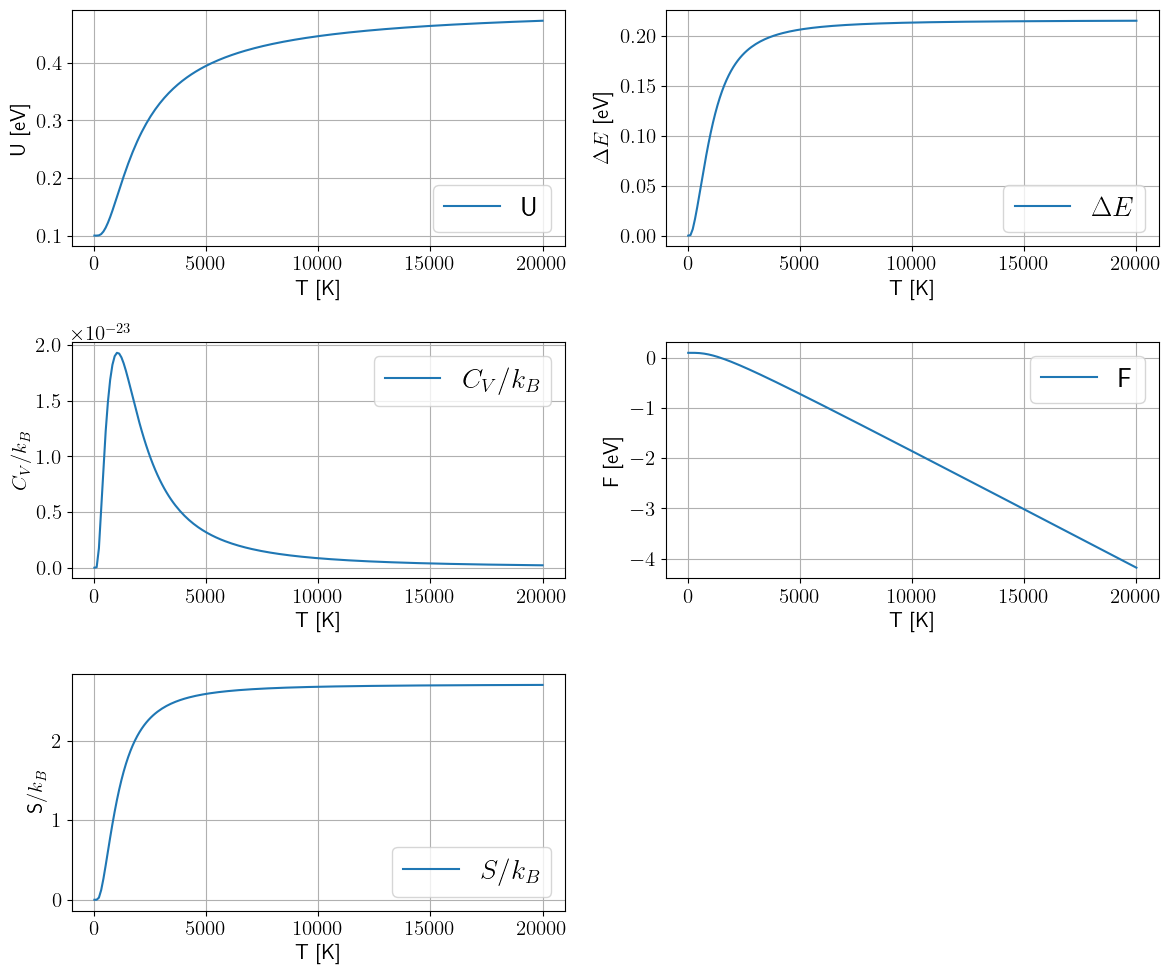

In [10]:
from itertools import combinations
from scipy.constants import k, e

kB = k       # Boltzmann constant [J/K]
eV = e       # Joule to eV conversion

def partition_function(n, N, gamma, T):
    beta = 1 / (kB * T)
    levels = [k * gamma for k in range(N)]  # single particle energies
    states = list(combinations(range(N), n))  # all configs
    
    energies = [sum(levels[i] for i in state) for state in states]
    weights = np.exp(-beta * np.array(energies))
    Z = np.sum(weights)
    return Z, np.array(energies), weights, beta

def thermodynamics(n, N, gamma, Tvals):
    U, F, S, Cv, DeltaE = [], [], [], [], []
    for T in Tvals:
        Z, energies, weights, beta = partition_function(n, N, gamma, T)
        probs = weights / Z
        U_T = np.sum(probs * energies)
        F_T = -kB * T * np.log(Z)
        S_T = (U_T - F_T) / T
        
        U2 = np.sum(probs * energies**2)
        fluct = U2 - U_T**2
        Cv_T = fluct / (kB * T**2)
        
        U.append(U_T/eV)
        F.append(F_T/eV)
        S.append(S_T/kB)
        Cv.append(Cv_T)
        DeltaE.append(np.sqrt(fluct)/eV)
        
    return np.array(U), np.array(F), np.array(S), np.array(Cv), np.array(DeltaE)

n, N  = 2, 6
gamma = 0.1 * eV   # spacing in J
Tvals = np.linspace(10, 20000, 200)  # Kelvin

U, F, S, Cv, DeltaE = thermodynamics(n, N, gamma, Tvals)

plt.figure(figsize=(12,10))

plt.subplot(321)
plt.plot(Tvals, U, label='U')
plt.xlabel("T [K]"); plt.ylabel("U [eV]"); plt.grid(True); plt.legend()

plt.subplot(322)
plt.plot(Tvals, DeltaE, label=r'$\Delta E$')
plt.xlabel("T [K]"); plt.ylabel(r'$\Delta E$ [eV]'); plt.grid(True); plt.legend(loc='lower right')

plt.subplot(323)
plt.plot(Tvals, Cv, label=r'$C_V/k_B$')
plt.xlabel("T [K]"); plt.ylabel(r'$C_V/k_B$'); plt.grid(True); plt.legend()

plt.subplot(324)
plt.plot(Tvals, F, label="F")
plt.xlabel("T [K]"); plt.ylabel("F [eV]"); plt.grid(True); plt.legend()

plt.subplot(325)
plt.plot(Tvals, S, label=r'$S/k_B$')
plt.xlabel("T [K]"); plt.ylabel("S/$k_B$"); plt.grid(True); plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

<span style="color:red">**Question 4**

<span style="color:red">Generate a list of microstates of n bosons distributed in N levels. (n and N are arbitrary input variables) 

In [11]:
from itertools import combinations_with_replacement

def boson_microstates(n, N):
    states = []
    for c in combinations_with_replacement(range(N), n):
        occ = [0]*N
        for i in c:
            occ[i] += 1
        states.append(tuple(occ))
    return states

microstates = boson_microstates(3, 2)
print("Number of microstates:", len(microstates))
for state in microstates:
    print(state)


Number of microstates: 4
(3, 0)
(2, 1)
(1, 2)
(0, 3)


<span style="color:red">**Question 4**
  
<span style="color:red">Calculate the canonical partition function of **2 bosons** in **three energy levels** $(\epsilon, 2\epsilon, 3\epsilon)$ as a function of temperature        
and then compute the thermodynamic properties listed in **Question No. 1**:

1. <span style="color:red">Internal energy $U$
2. <span style="color:red">Energy fluctuation $\Delta E$
3. <span style="color:red">Specific heat at constant volume $C_V$
4. <span style="color:red">Free energy $F$
5. <span style="color:red">Entropy $S$

 <span style="color:red">**Important condition**: Manual listing of the two-particle energy levels should be avoided.                                                                           
 <span style="color:red">You may use the **program written in the previous question** (for generating boson microstates).

 <span style="color:red">For numerical work, the use of `scipy.constants` is encouraged.



* **System**: 2 bosons in **3 single-particle energy levels**:

  $$
  \epsilon_1 = \epsilon,\quad \epsilon_2 = 2\epsilon,\quad \epsilon_3 = 3\epsilon
  $$

* Generate microstates of 2 bosons in 3 levels (using the function from the previous step).

* For each microstate, compute the **total energy** $E = \sum_k n_k \epsilon_k$.

* Compute the **canonical partition function**:

  $$
  Z(\beta) = \sum_{\text{microstates}} e^{-\beta E}
  $$

* Compute thermodynamic properties from $Z$:

  * **Free energy** :

    $$
    F = -k_B T \ln Z
    $$
  * **Mean energy** :

    $$
    U = -\frac{\partial \ln Z}{\partial \beta}
    $$
  * **Entropy** :

    $$
    S = \frac{U - F}{T}
    $$
  * **Heat capacity** :

    $$
    C_V = \frac{\partial U}{\partial T}
    $$


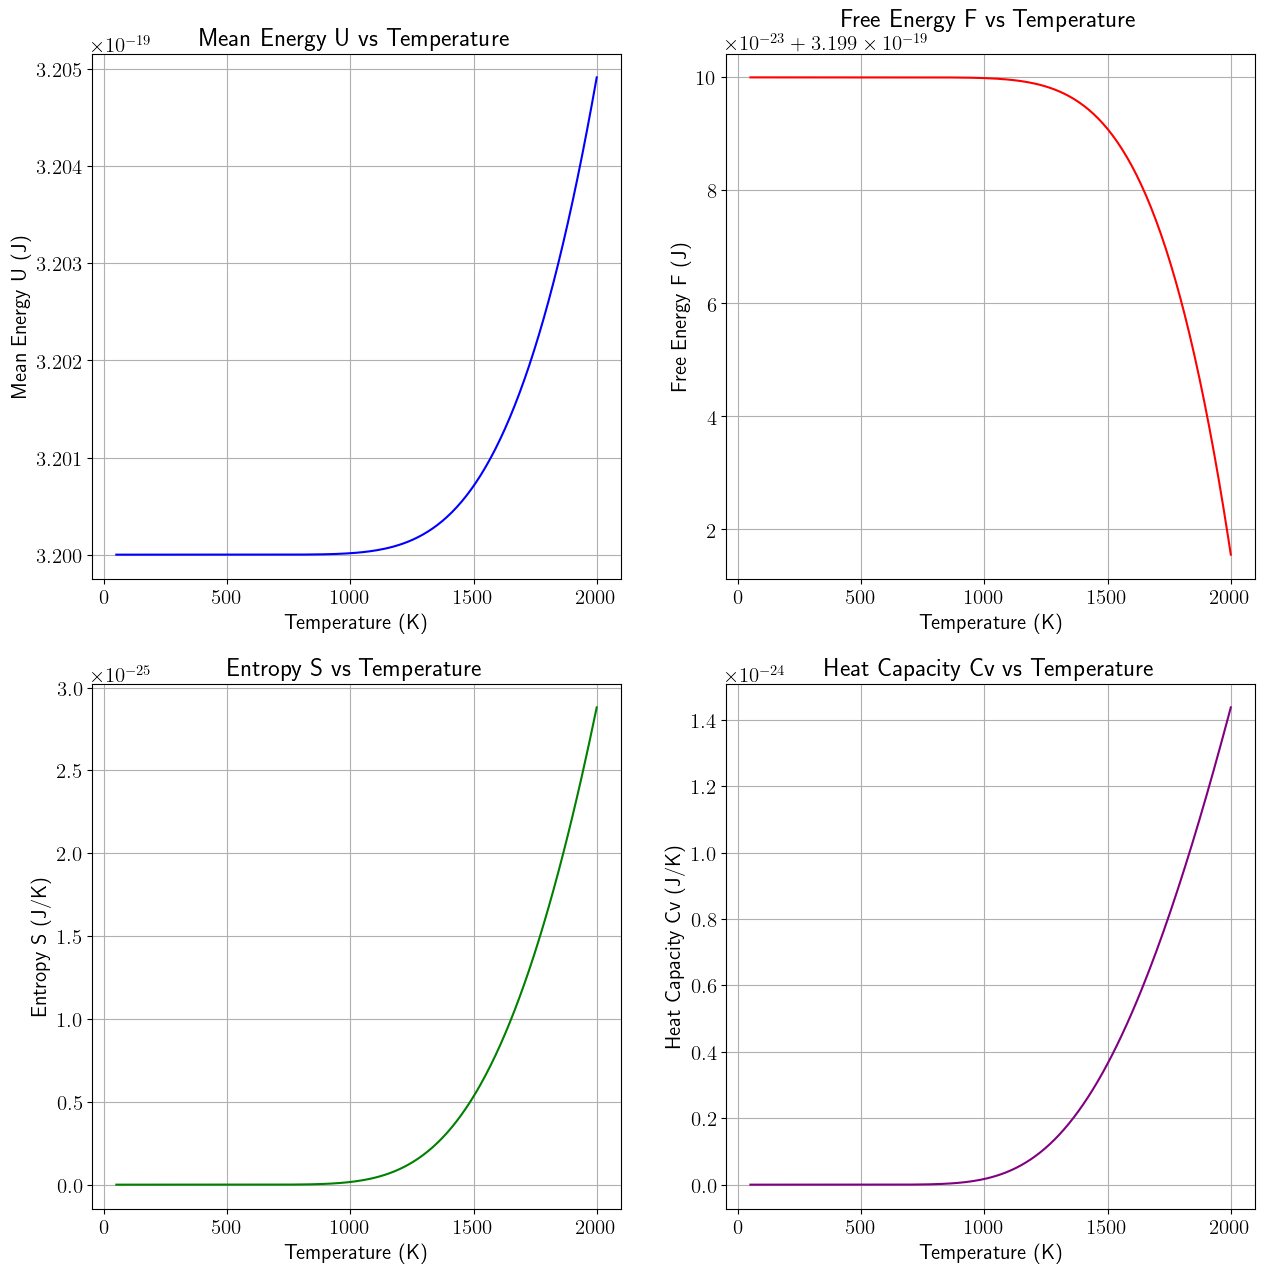

In [12]:
from itertools import combinations_with_replacement
from scipy.constants import Boltzmann

def boson_microstates(n, N):
    states = []
    for c in combinations_with_replacement(range(N), n):
        occ = [0]*N
        for i in c:
            occ[i] += 1
        states.append(tuple(occ))
    return states

def thermodynamics(n, levels, T):
    beta = 1/(Boltzmann*T)
    microstates = boson_microstates(n, len(levels))
    Z = 0.0
    E_avg = 0.0
    E2_avg = 0.0
    
    for state in microstates:
        E = sum(state[i]*levels[i] for i in range(len(levels)))
        w = np.exp(-beta*E)
        Z += w
        E_avg += E*w
        E2_avg += (E**2)*w

    E_avg /= Z
    E2_avg /= Z

    F = -Boltzmann*T*np.log(Z)
    U = E_avg
    S = (U - F)/T
    Cv = (E2_avg - E_avg**2)/(Boltzmann*T**2)

    return Z, F, U, S, Cv

epsilon = 1.0 * 1.6e-19  # 1 eV in J
levels  = [epsilon, 2*epsilon, 3*epsilon]
T_range = np.linspace(50, 2000, 200)  # Temperature range
Z_vals, F_vals, U_vals, S_vals, Cv_vals = [], [], [], [], []

for T in T_range:
    Z, F, U, S, Cv = thermodynamics(2, levels, T)
    Z_vals.append(Z)
    F_vals.append(F)
    U_vals.append(U)
    S_vals.append(S)
    Cv_vals.append(Cv)

plt.figure(figsize=(15, 15))

plt.subplot(221)
plt.plot(T_range, U_vals, color='blue')
plt.xlabel("Temperature (K)")
plt.ylabel("Mean Energy U (J)")
plt.title("Mean Energy U vs Temperature")
plt.grid(True)

plt.subplot(222)
plt.plot(T_range, F_vals, color='red')
plt.xlabel("Temperature (K)")
plt.ylabel("Free Energy F (J)")
plt.title("Free Energy F vs Temperature")
plt.grid(True)

plt.subplot(223)
plt.plot(T_range, S_vals, color='green')
plt.xlabel("Temperature (K)")
plt.ylabel("Entropy S (J/K)")
plt.title("Entropy S vs Temperature")
plt.grid(True)

plt.subplot(224)
plt.plot(T_range, Cv_vals, color='purple')
plt.xlabel("Temperature (K)")
plt.ylabel("Heat Capacity Cv (J/K)")
plt.title("Heat Capacity Cv vs Temperature")
plt.grid(True)
plt.show()


<span style="color:red">**Problem 5**

1. <span style="color:red">Plot Planck’s law for blackbody radiation and the Rayleigh-Jeans law superposed on the same graph for temperatures $T = 4000\,\text{K}$ and $T = 8000\,\text{K}$.                                                                                                                                                 
Use the frequency range $\nu \in [1, 15 k_BT/h]$ (units consistent with constants).

2. <span style="color:red">For both temperatures, determine the frequency at which the energy density is maximum.                                                                      
Identify the region of the electromagnetic spectrum corresponding to these frequencies.

3. <span style="color:red">Calculate the minimum frequency $\nu_\text{c}$ at $T = 300\,\text{K}$ where the difference between the energy densities                                  
predicted by Planck’s law and the Rayleigh-Jeans law is at least 10% (i.e., $\frac{|u_{\tiny \text{Planck}} - u_{\tiny \text{RJ}}|}{u_{\tiny \text{Planck}}} \ge 0.1$).

4. <span style="color:red">Calculate the total energy in the visible spectrum ($\nu = 4 \times 10^{14}$ Hz to $7.5 \times 10^{14}$ Hz) for $T \in [100, 400]$ K by direct numerical integration.                                                                                                                                                 
Plot the visible energy as a function of temperature.


1. **Planck’s law** (spectral energy density per unit frequency):

$$
u_\text{Planck}(\nu, T) = \frac{8 \pi h \nu^3}{c^3} \frac{1}{\exp(h\nu/k_B T) - 1}
$$

2. **Rayleigh-Jeans law**:

$$
u_\text{RJ}(\nu, T) = \frac{8 \pi \nu^2 k_B T}{c^3}
$$

Where:

* $h = 6.626\times10^{-34}\,\mathrm{J\cdot s}$ (Planck constant)
* $k_B = 1.381\times10^{-23}\,\mathrm{J/K}$ (Boltzmann constant)
* $c = 3\times10^8\,\mathrm{m/s}$ (speed of light)


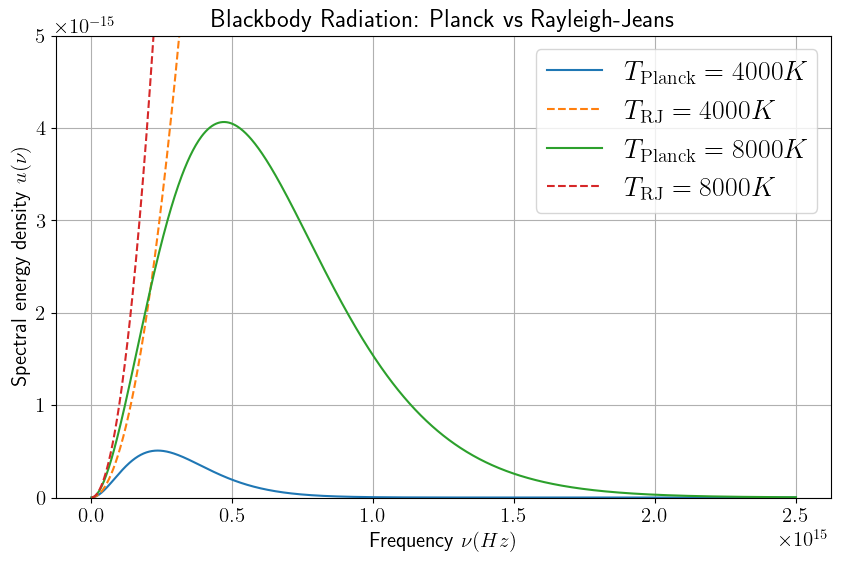

T=4000 K: Peak frequency = 2.35e+14 Hz
T=8000 K: Peak frequency = 4.70e+14 Hz
Minimum frequency ν_c where difference >=10%: 1.18e+12 Hz


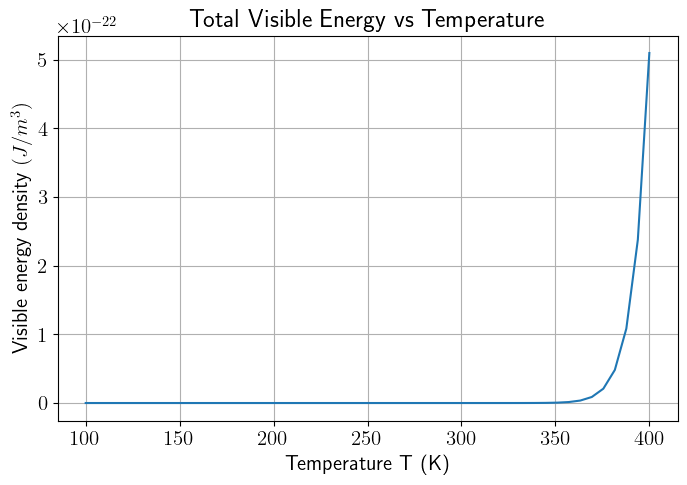

In [13]:
from scipy.optimize import fminbound
from scipy.integrate import quad


h = 6.626e-34       # Planck constant, J.s
kB = 1.381e-23      # Boltzmann constant, J/K
c = 3e8             # Speed of light, m/s

def u_planck(nu, T):
    return (8*np.pi*h*nu**3/c**3) / (np.exp(h*nu/(kB*T)) - 1)

def u_RJ(nu, T):
    return (8*np.pi*nu**2*kB*T/c**3)

# Part 1: Plot for T=4000 K and 8000 K
T_vals = [4000, 8000]
nu_max = 15 * kB * max(T_vals)/h
nu = np.linspace(1, nu_max, 1000)

plt.figure(figsize=(10,6))
for T in T_vals:
    plt.plot(nu, u_planck(nu,T), label=rf'$T_{{\rm Planck}}={T}K$')
    plt.plot(nu, u_RJ(nu,T), '--', label=rf'$T_{{\rm RJ}}={T}K$')
plt.xlabel(r'Frequency $\nu (Hz)$')
plt.ylabel(r'Spectral energy density $u(\nu)$')
plt.title('Blackbody Radiation: Planck vs Rayleigh-Jeans')
plt.legend()
plt.grid(True)
plt.ylim([0, 0.05e-13])
plt.show()

# Part 2: Find frequency at maximum energy density
def max_freq_planck(T):
    nu_max = fminbound(lambda nu: -u_planck(nu,T), 0, 1e15)
    return nu_max

for T in T_vals:
    nu_peak = max_freq_planck(T)
    print(f"T={T} K: Peak frequency = {nu_peak:.2e} Hz")

# Part 3: Minimum frequency where |u_planck - u_RJ|/u_planck >= 0.1 at T=300K
T_c = 300
nu_test = np.linspace(1e10, 1e14, 10000)
diff = np.abs(u_planck(nu_test, T_c) - u_RJ(nu_test, T_c)) / u_planck(nu_test, T_c)
nu_c = nu_test[np.where(diff >= 0.1)[0][0]]
print(f"Minimum frequency ν_c where difference >=10%: {nu_c:.2e} Hz")

# Part 4: Total energy in visible spectrum
nu_vis_min = 4e14
nu_vis_max = 7.5e14
T_range = np.linspace(100, 400, 50)
E_vis = []

for T in T_range:
    E, _ = quad(lambda nu: u_planck(nu,T), nu_vis_min, nu_vis_max)
    E_vis.append(E)

plt.figure(figsize=(8,5))
plt.plot(T_range, E_vis)
plt.xlabel('Temperature T (K)')
plt.ylabel(r'Visible energy density $(J/m^3)$')
plt.title('Total Visible Energy vs Temperature')
plt.grid(True)
plt.show()

##  Equilibrium of the Einstein crystal

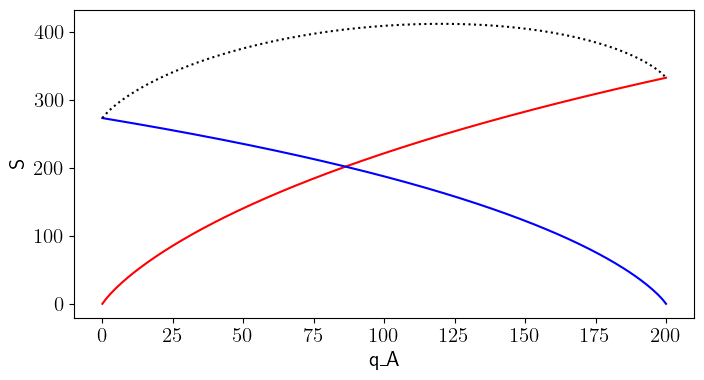

In [14]:
from scipy.special import comb 

NA = 300
NB = 200
q = 200
multA = np.zeros(q+1,float)
multB = np.zeros(q+1,float)
mult = np.zeros(q+1,float)
N = NA + NB
qvalue = np.array(range(q+1))
for ik in range(len(qvalue)):
    qA = qvalue[ik]
    qB = q - qA
    multA[ik] = comb(qA+NA-1,qA)
    multB[ik] = comb(qB+NB-1,qB)
    mult[ik] = multA[ik]*multB[ik]
SA = np.log(multA)
SB = np.log(multB)
STOT = SA + SB

plt.figure(figsize=(8,4))
plt.plot(qvalue,SA,'-r',qvalue,SB,'-b',qvalue,STOT,':k')
plt.xlabel('q_A')
plt.ylabel('S')
plt.show()

## E

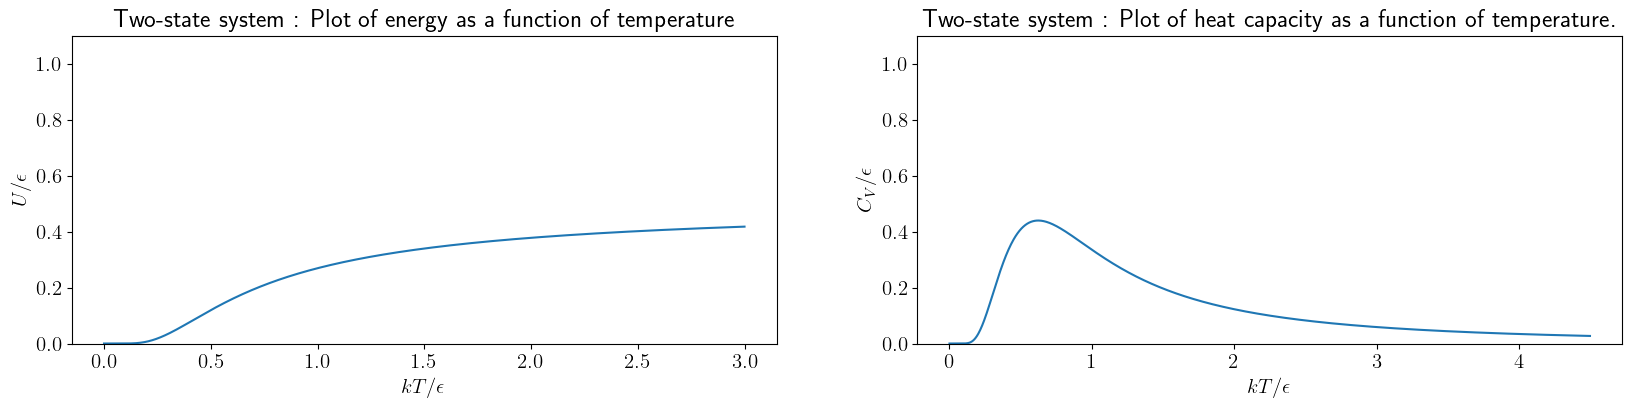

In [15]:
x = np.linspace(0,3,1000)
E = np.exp(-1/x)/(1+np.exp(-1/x))

plt.figure(figsize=(20,4))

plt.subplot(121)
plt.plot(x,E)
plt.title('Two-state system : Plot of energy as a function of temperature')
plt.xlabel(r'$kT/\epsilon$')
plt.ylabel(r'$U/\epsilon$')
plt.ylim(0,1.1)

CV = np.diff(E)/np.diff(x)
xmid = 0.5*(x[1:])+x[0:-1]
plt.subplot(122)
plt.plot(xmid,CV)
plt.title('Two-state system : Plot of heat capacity as a function of temperature.')
plt.xlabel(r'$kT/\epsilon$')
plt.ylabel(r'$C_V/\epsilon$')
plt.ylim(0,1.1)
plt.show()

In [16]:
h = 6.626e-34              # Plank's const
c = 3.0e+8                 # speed of light
k = 1.38e-23               # Boltzmann constant (joule per kelvin)
e = 1.6e-19                # charge of electron
E = 0.01

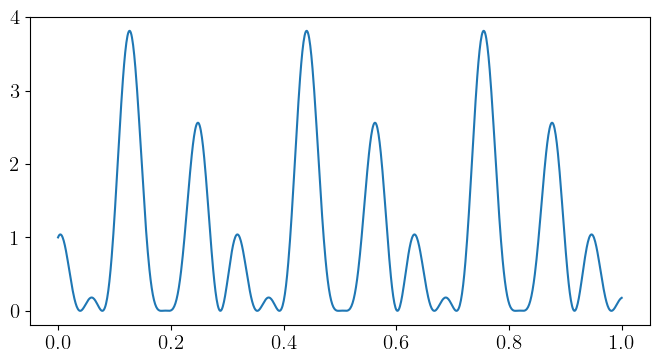

In [17]:
from sympy import *
u = symbols('u')
f = (sin(10*u)+cos(50*u))**2
g=integrate(f)
fint = float(g.subs(u,1))
# Convert to Python function
fun = lambdify(u,f,"numpy")

# Plot f(x)
xx = np.linspace(0,1,1000)
yy = fun(xx)
plt.figure(figsize=(8,4))
plt.plot(xx,yy)

Text(0, 0.5, 'I')

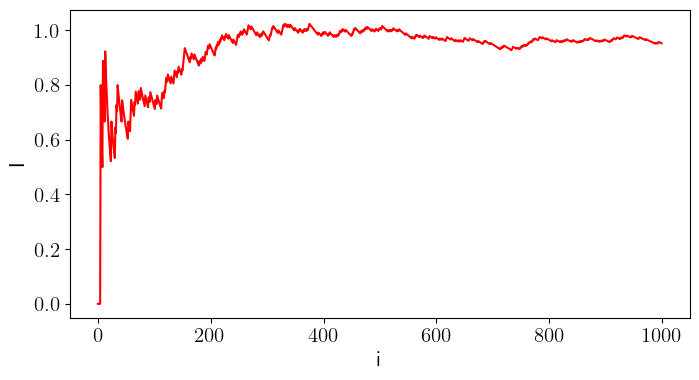

In [18]:
fmax = 4.0 # Upper limit of f(x) for x (0,1)
N = 1000
hit = 0.
intest = np.zeros((N,1),float)
for i in range(1,N):
    x = rand(1); y = rand(1)*fmax
    if (y<fun(x)):
        hit = hit + 1
    intest[i] = hit/i*fmax

plt.figure(figsize=(8,4))
plt.plot(np.array(range(0,N)),intest,'-r')
plt.xlabel('i')
plt.ylabel('I')

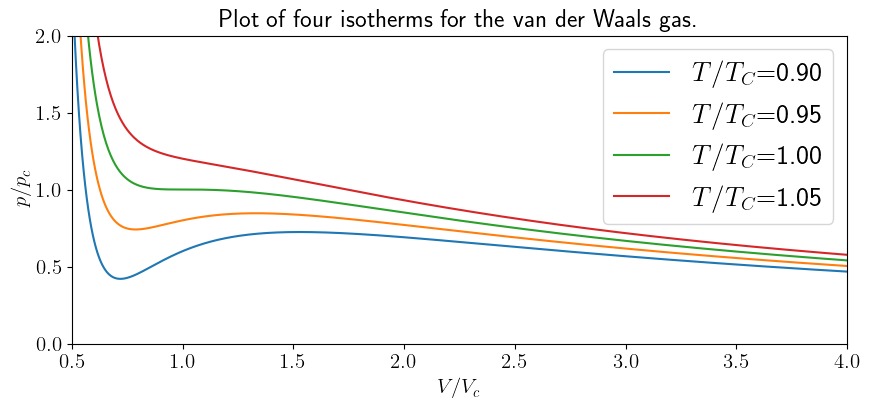

In [19]:
That = [0.9,0.95,1.0,1.05]
V = np.linspace(0.5,4.0,1000)
plt.figure(figsize=(10,4))

for i in range(len(That)):
    T = That[i]
    p = 8.0/3.0*T/(V-1/3)-3.0/(V**2)
    plt.plot(V,p,label=r'$T/T_C$=%0.2f'%T)
plt.xlabel(r'$V/V_c$')
plt.ylabel(r'$p/p_c$')
plt.ylim(0,2)
plt.xlim(0.5,4)
plt.legend()
plt.title('Plot of four isotherms for the van der Waals gas.')
plt.show()

# $\varphi=\varphi_0[(\frac{r_o}{r})^{12} - 2(\frac{r_o}{r})^6]$

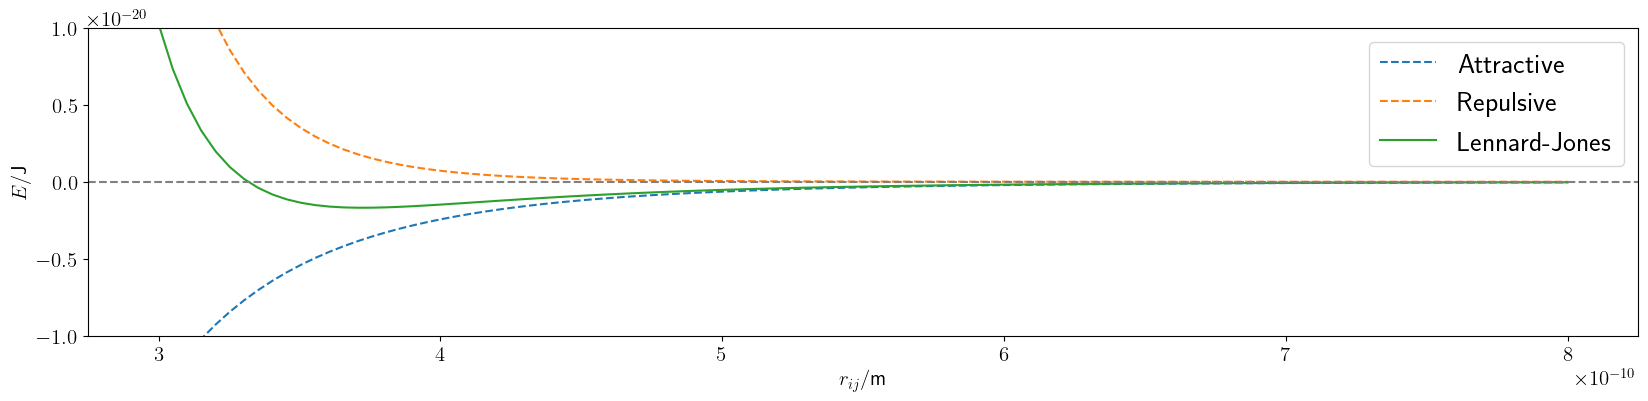

In [20]:
def attractive(dr, b):
    return  -b /dr**6

def repulsive(dr, a):
    return  a /dr**12

def lj(dr, constants):
    return (repulsive(dr, constants[0]) + attractive(dr, constants[1]))

E=8.854187817e-12
r = np.linspace(3e-10, 8e-10, 100)
plt.figure(figsize=(20,4))

plt.plot(r, attractive(r, 10.e-78),'--', label='Attractive')
plt.plot(r, repulsive(r, 1.2e-134),'--', label='Repulsive')
plt.plot(r, lj(r, [1.2e-134, 9.e-78]), label='Lennard-Jones')
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel(r'$r_{ij}$/m')
plt.ylabel(r'$E$/J')
plt.ylim(-1e-20,1e-20)
plt.legend()
plt.show()

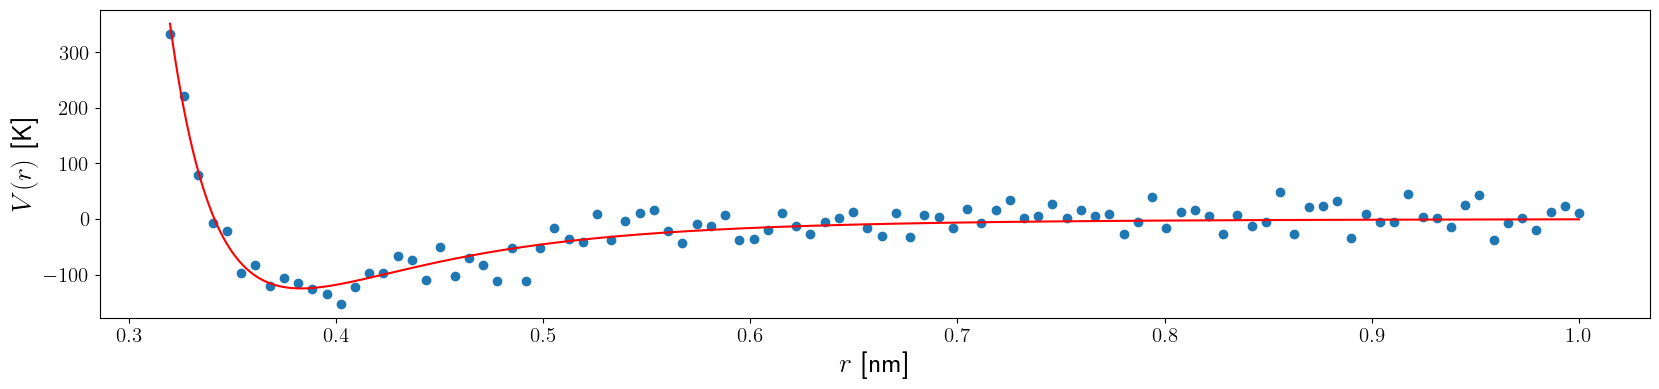

In [21]:
r_data, V_data = np.loadtxt('../youtube_channel-main/Data/curvefite2.txt')
r_data*=1e9
V_data/=1.38e-23

def model_f(r, sigma, epsilon):
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)
# Obtain initial guesses
eps_init_guess = 120
sig_init_guess = 2**(-1/6) * 0.4
#Get the optimal parameters
popt, pcov = curve_fit(model_f, r_data, V_data, p0=[sig_init_guess,
                                                    eps_init_guess])
sig_opt, eps_opt = popt
#Lets plot data next to model

r_model = np.linspace(min(r_data), max(r_data), 1000)
V_model = model_f(r_model, sig_opt, eps_opt)
plt.figure(figsize=(20,4))

plt.scatter(r_data, V_data)
plt.plot(r_model, V_model, color='r')
plt.xlabel('$r$ [nm]', fontsize=20)
plt.ylabel('$V(r)$ [K]', fontsize=20)
plt.show()

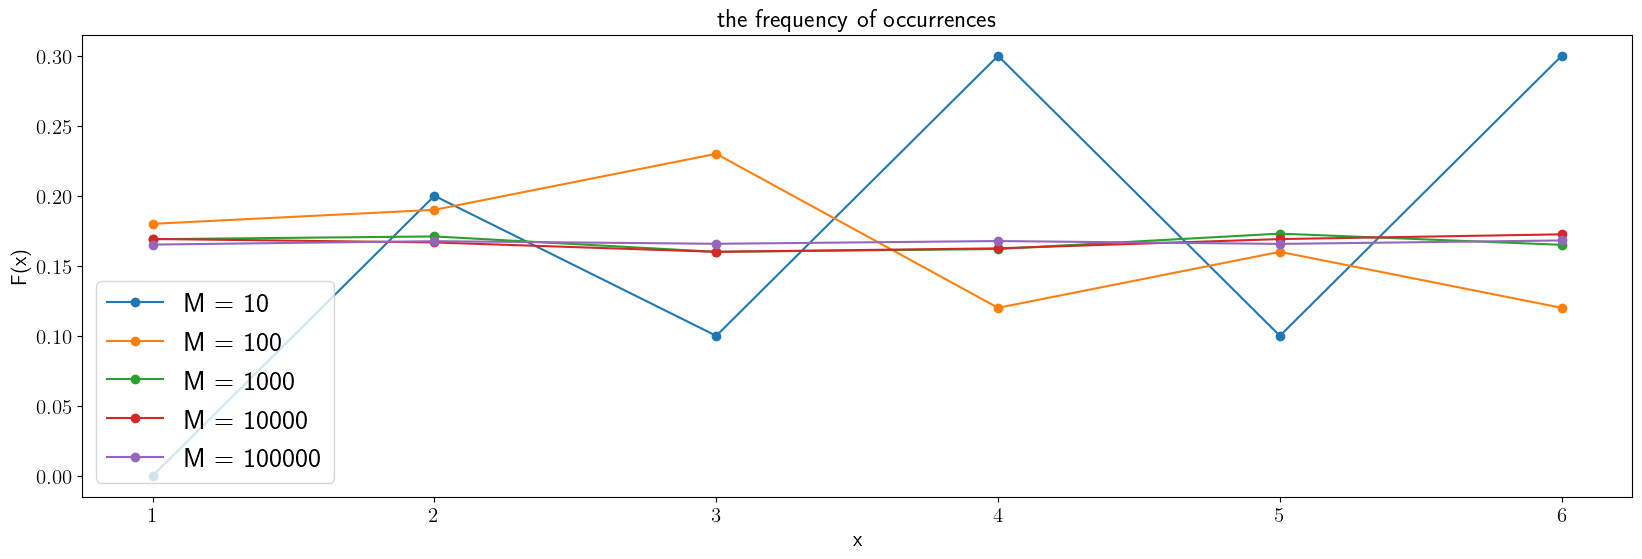

In [22]:
Mval = array([10,100,1000,10000,100000])
nM = len(Mval)
plt.figure(figsize=(20,6))

for im in range(nM):
    M = Mval[im]
    m = np.random.randint(0,6,M)+1
    [Nx,edges] = histogram(m,6,range=(0.5,6.5))
    Fx = Nx/M
    x = (edges[1:]+edges[:-1])/2
    plt.plot(x,Fx,'-o',label='M = %i'%M)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('the frequency of occurrences')
plt.legend()
plt.show()

$\displaystyle{ g_p(Z)=\int_0^\infty\frac{x^{p-1}}{Z^{-1}\exp(x)-1}}$

$\displaystyle{ f_p(Z)=\int_0^\infty\frac{x^{p-1}}{Z^{-1}\exp(x)+1}}$

In [23]:
from scipy.integrate import quad
from scipy.special import gamma

def g(p, Z):
    I = quad(lambda x: x**(p-1)/(Z**(-1)*np.exp(x)-1), 0, np.inf, limit=200)[0]
    return I / gamma(p)

def f(p, Z):
    I = quad(lambda x: x**(p-1)/(Z**(-1)*np.exp(x)+1), 0, np.inf, limit=200)[0]
    return I / gamma(p)

Z = 1
p = 5/2
G = g(p, Z)
F = f(p, Z)

print('G =', G, '\nF =', F)

G = 1.341487257250918 
F = 0.8671998890110723


$ \displaystyle{\lambda = \sqrt{\frac{2\pi\hbar^2}{mk_B T}}}$

In [24]:
def lam(T):
    hb = 1.05457182 * 1e-34
    k_B = 1.380649*1e-23 
    m = 1
    return (2*np.pi*hb**2)/(m*k_B*T)

$\displaystyle{\frac{V}{\lambda^3_{T_C}}g_{\frac{3}{2}}(1)=N}$

$\displaystyle{\frac{V}{\lambda^3_{T}}g_{\frac{3}{2}}(1)=N_T<N.}$

$\displaystyle{\frac{\lambda^3_{T}}{\lambda^3_{T_C}}=\frac{N}{N_T}}$

$\displaystyle{N_0=N-N_T=N\bigg[1-\bigg(\frac{T}{T_C}\bigg)^{\frac{3}{2}}\bigg]}$

$\displaystyle{\frac{N_0}{N}=1-\bigg(\frac{T}{T_C}\bigg)^{\frac{3}{2}}}$

$\displaystyle{\frac{C_V}{Nk_B}=\frac{15}{4} \frac{g_{\frac{5}{2}}(z)}{g_{\frac{3}{2}}(z)} - \frac{9}{4}\frac{g_{\frac{3}{2}}(z)}{g_{\frac{1}{2}}(z)}}$

$\displaystyle{\frac{g_{3/2}(z)}{g_{3/2}(1)}=\bigg(\frac{T_C}{T}\bigg)^{3/2}<1.}$

In [25]:
m_He = 6.65*1e-24 # g
V = 27.6 # cc/mole
Tc = 3.13 # k
T = np.linspace(1.2, Tc, 100)


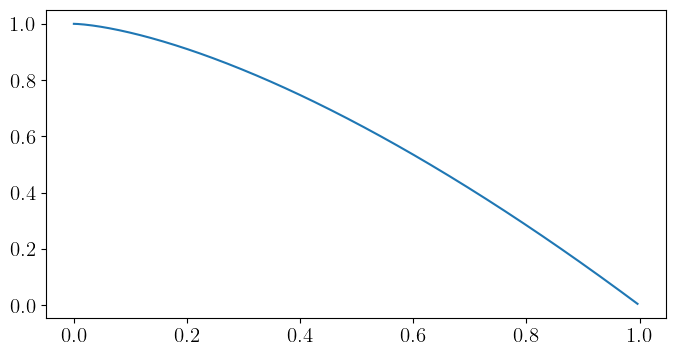

In [26]:
Tc=273

T = np.arange(0,273)
T_Tc=T/Tc
No_N=1-(T_Tc)**(3/2)
plt.figure(figsize=(8,4))
plt.plot(T_Tc, No_N)